# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
from webdriver_manager.chrome import ChromeDriverManager
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless=False)

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html). Inspect the page to identify which elements to scrape. Note that the URL is `https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html`.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html

url = 'https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html'

browser.visit(url)

# again use delay in case

browser.is_element_present_by_css('div.list_text', wait_time=1)

False

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Create a Beautiful Soup Object

html = browser.html
html_soup = soup(html, 'html.parser')


In [5]:
# Extract all rows of data

table = html_soup.find('table', class_='table')

table 


<table class="table">
<tbody><tr>
<th>id</th>
<th>terrestrial_date</th>
<th>sol</th>
<th>ls</th>
<th>month</th>
<th>min_temp</th>
<th>pressure</th>
</tr>
<tr class="data-row">
<td>2</td>
<td>2012-08-16</td>
<td>10</td>
<td>155</td>
<td>6</td>
<td>-75.0</td>
<td>739.0</td>
</tr>
<tr class="data-row">
<td>13</td>
<td>2012-08-17</td>
<td>11</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>24</td>
<td>2012-08-18</td>
<td>12</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>741.0</td>
</tr>
<tr class="data-row">
<td>35</td>
<td>2012-08-19</td>
<td>13</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>732.0</td>
</tr>
<tr class="data-row">
<td>46</td>
<td>2012-08-20</td>
<td>14</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>57</td>
<td>2012-08-21</td>
<td>15</td>
<td>158</td>
<td>6</td>
<td>-78.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>68</td>
<td>2012-08-22</td>
<td>16</td>
<td>158</td>
<td>6</td>
<

In [6]:
import pandas as pd

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [13]:
# Create an empty list

mars_temp = {}

headers= html_soup.find_all('th')
data= html_soup.find_all('td')


# Loop through the scraped data to create a list of rows

mars_temp = {}
index = 0

for header in headers:
    
    keys = header.text
    
    mars_temp[keys] = []
    
    for x in data[index::len(headers)]:
        
        values = x.text
        
        mars_temp[keys].append(values)
    index= index +1
    
print(mars_temp)


{'id': ['2', '13', '24', '35', '46', '57', '68', '79', '112', '114', '123', '134', '145', '156', '163', '170', '171', '172', '173', '175', '176', '177', '178', '179', '180', '181', '182', '183', '184', '185', '186', '187', '188', '189', '190', '191', '192', '193', '194', '195', '196', '197', '198', '199', '200', '201', '202', '203', '204', '205', '206', '207', '208', '209', '210', '211', '212', '213', '214', '215', '216', '217', '218', '219', '220', '221', '222', '223', '224', '225', '226', '227', '228', '229', '230', '231', '233', '234', '235', '236', '237', '238', '239', '240', '241', '242', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '69', '70', '71', '72', '73', '74', '75', '76'

In [14]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names

df = pd.DataFrame(mars_temp)

df

print(df.to_string(index= False))

  id terrestrial_date  sol  ls month min_temp pressure
   2       2012-08-16   10 155     6    -75.0    739.0
  13       2012-08-17   11 156     6    -76.0    740.0
  24       2012-08-18   12 156     6    -76.0    741.0
  35       2012-08-19   13 157     6    -74.0    732.0
  46       2012-08-20   14 157     6    -74.0    740.0
  57       2012-08-21   15 158     6    -78.0    740.0
  68       2012-08-22   16 158     6    -77.0    740.0
  79       2012-08-23   17 159     6    -76.0    742.0
 112       2012-08-27   21 161     6    -74.0    741.0
 114       2012-08-28   22 162     6    -74.0    742.0
 123       2012-08-29   23 162     6    -75.0    741.0
 134       2012-08-30   24 163     6    -75.0    742.0
 145       2012-08-31   25 163     6    -75.0    743.0
 156       2012-09-01   26 164     6    -76.0    745.0
 163       2012-09-02   27 164     6    -75.0    743.0
 170       2012-09-03   28 165     6    -75.0    745.0
 171       2012-09-04   29 166     6    -75.0    747.0
 172      

In [15]:
# Confirm DataFrame was created successfully

df


,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [16]:
# Examine data type of each column

df.dtypes


id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [17]:
# Change data types for data analysis

df= df.astype({'sol': int, 'ls': int, 'month': int, 'min_temp': float, 'pressure': float})

df['terrestrial_date']= pd.to_datetime(df['terrestrial_date'])



In [18]:
# Confirm type changes were successful by examining data types again

df.dtypes

id                          object
terrestrial_date    datetime64[ns]
sol                          int32
ls                           int32
month                        int32
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [19]:
df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


In [22]:
# 1. How many months are there on Mars?

months= df['month'].unique()

months

array([ 6,  7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5])

In [24]:
# 2. How many Martian days' worth of data are there?

days= df['sol'].count()

days

1867

In [43]:
# 3. What is the average low temperature by month?

avg_month_temp= df['min_temp'].groupby(df['month']).mean()
                                       
temp_df= pd.DataFrame(avg_month_temp)

temp_df


,min_temp
month,
1,-77.160920
2,-79.932584
3,-83.307292
4,-82.747423
5,-79.308725
6,-75.299320
7,-72.281690
8,-68.382979
9,-69.171642


Text(0.5, 1.0, 'Mars Average Low Temp')

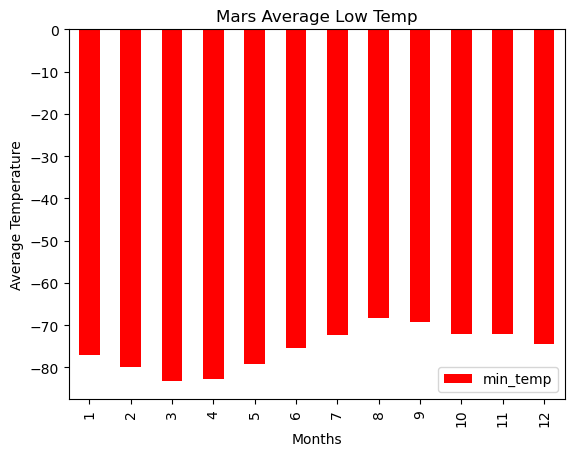

In [64]:
# Plot the average temperature by month



temp_df.plot.bar(color= "red")

plt.xlabel("Months")

plt.ylabel("Average Temperature")

plt.title("Mars Average Low Temp")


In [69]:
# Identify the coldest and hottest months in Curiosity's location

coldest_month= temp_df.min()

coldest_month


min_temp   -83.307292
dtype: float64

In [66]:
# Warmest Month

warmest_month= temp_df.max()

warmest_month

min_temp   -68.382979
dtype: float64

In [71]:
# 4. Average pressure by Martian month

avg_pressure= df['pressure'].groupby(df['month']).mean()

avg_pressure


month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

In [72]:
avg_pressure_df= pd.DataFrame(avg_pressure)

avg_pressure_df

,pressure
month,
1,862.488506
2,889.455056
3,877.322917
4,806.329897
5,748.557047
6,745.054422
7,795.105634
8,873.829787
9,913.305970


Text(0.5, 1.0, 'Mars Average Pressure')

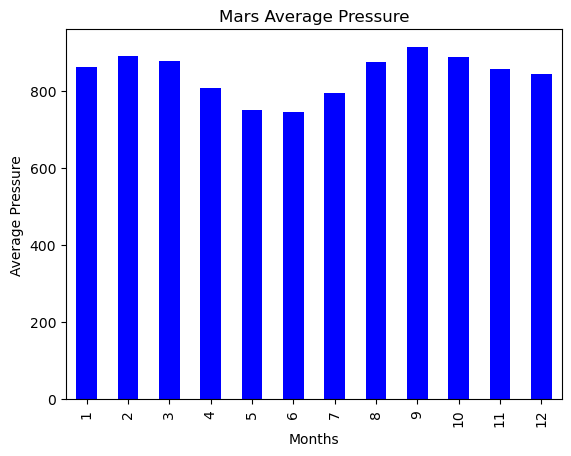

In [74]:
# Plot the average pressure by month

avg_pressure.plot.bar(color= "blue")

plt.xlabel("Months")

plt.ylabel("Average Pressure")

plt.title("Mars Average Pressure")


In [ ]:
# 5. How many terrestrial (earth) days are there in a Martian year?

#i'm sorry i don't understand this question?  


On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [75]:
# Write the data to a CSV

df.to_csv("mars_facts.csv")
temp_df.to_csv("mars_temps.csv")
avg_pressure_df.to_csv("mars_pressure.csv")



In [76]:
browser.quit()